<a href="https://colab.research.google.com/github/KashmalaSiddiqui/210FinalProject/blob/main/210Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving instagram-kashmalaomer-2024-10-24-XRLfCyb3.zip to instagram-kashmalaomer-2024-10-24-XRLfCyb3.zip


In [2]:
import zipfile
import os

# Specify the name of your uploaded zip file
zip_file_name = "instagram-kashmalaomer-2024-10-24-XRLfCyb3.zip"

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("extracted_data")

# List the extracted files
print("Extracted files:", os.listdir("extracted_data"))

# Later from this, just keep te your_instagram_activity, ads_information and delete the rest
#then we work with the instagram activity

Extracted files: ['ads_information', 'preferences', 'apps_and_websites_off_of_instagram', 'personal_information', 'security_and_login_information', 'logged_information', 'your_instagram_activity', 'connections', 'media']


In [3]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.4 MB/s eta 0:00:00


## AD info


In [ ]:
import json
import pandas as pd

ads_info_path = "/content/extracted_data/ads_information"

## **Comments parsing**

In [ ]:
#Old
import json
import pandas as pd

# Specify the file path
file_path = "/content/extracted_data/your_instagram_activity/comments/post_comments_1.json"

# Load the JSON file
with open(file_path, 'r', encoding='utf-8') as f:
    comments_data = json.load(f)

# Convert JSON to a DataFrame
df_comments = pd.json_normalize(comments_data)

# Function to fix double UTF-8 encoded strings
def fix_double_encoding(text):
    try:
        # Decode as bytes, then re-encode as UTF-8
        return bytes(text, "utf-8").decode("utf-8").encode("latin1").decode("utf-8")
    except:
        return text  # Return original text if decoding fails

# Fix the 'Comment.value' column
if 'string_map_data.Comment.value' in df_comments.columns:
    df_comments['string_map_data.Comment.value'] = df_comments['string_map_data.Comment.value'].apply(
        lambda x: fix_double_encoding(x) if isinstance(x, str) else x
    )

# Display the cleaned DataFrame
print("Cleaned Comments with Proper Decoding:")
print(df_comments[['string_map_data.Comment.value']].head())

# Optional: Extract emojis using emoji library
try:
    import emoji
    df_comments['emojis'] = df_comments['string_map_data.Comment.value'].apply(
        lambda x: ''.join(c for c in x if c in emoji.EMOJI_DATA) if isinstance(x, str) else ''
    )
    print("\nComments with extracted emojis:")
    print(df_comments[['string_map_data.Comment.value', 'emojis']].head())
except ImportError:
    print("\nInstall the 'emoji' library for emoji extraction: pip install emoji")


Cleaned Comments with Proper Decoding:
  string_map_data.Comment.value
0                So pretty ❤️❤️
1                          ❤️❤️
2                          ❤️❤️
3                          ❤️❤️
4                Kya talent hai

Comments with extracted emojis:
  string_map_data.Comment.value emojis
0                So pretty ❤️❤️     ❤❤
1                          ❤️❤️     ❤❤
2                          ❤️❤️     ❤❤
3                          ❤️❤️     ❤❤
4                Kya talent hai       


Columns in the dataset: Index(['media_list_data', 'string_map_data.Comment.value',
       'string_map_data.Media Owner.value', 'string_map_data.Time.timestamp'],
      dtype='object')

Sample Data:
  media_list_data string_map_data.Comment.value  \
0   [{'uri': ''}]        So pretty â¤ï¸â¤ï¸   
1   [{'uri': ''}]                  â¤ï¸â¤ï¸   
2   [{'uri': ''}]                  â¤ï¸â¤ï¸   
3   [{'uri': ''}]                  â¤ï¸â¤ï¸   
4   [{'uri': ''}]                Kya talent hai   

  string_map_data.Media Owner.value  string_map_data.Time.timestamp  
0                    itisjustmaryam                      1726416650  
1                    itisjustmaryam                      1725975157  
2                   areebah.shakeel                      1723142603  
3                      cheers2abeer                      1718046128  
4                      cheers2abeer                      1718041961  

Top 10 Most Common Words:
[('❤️❤️', 5), ('❤️❤️❤️', 3), ('So', 1), ('pretty

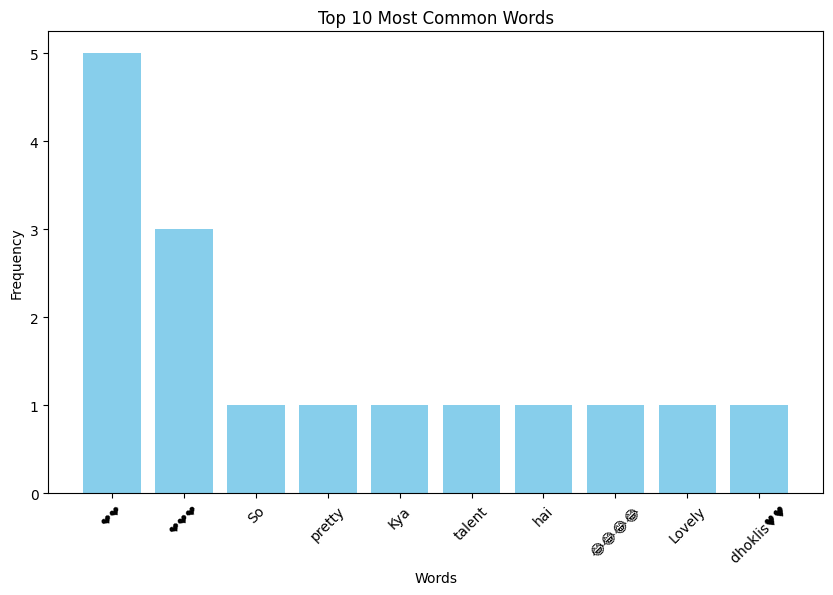


Top 10 Most Used Emojis:
[('❤', 24), ('😂', 4), ('♥', 2)]


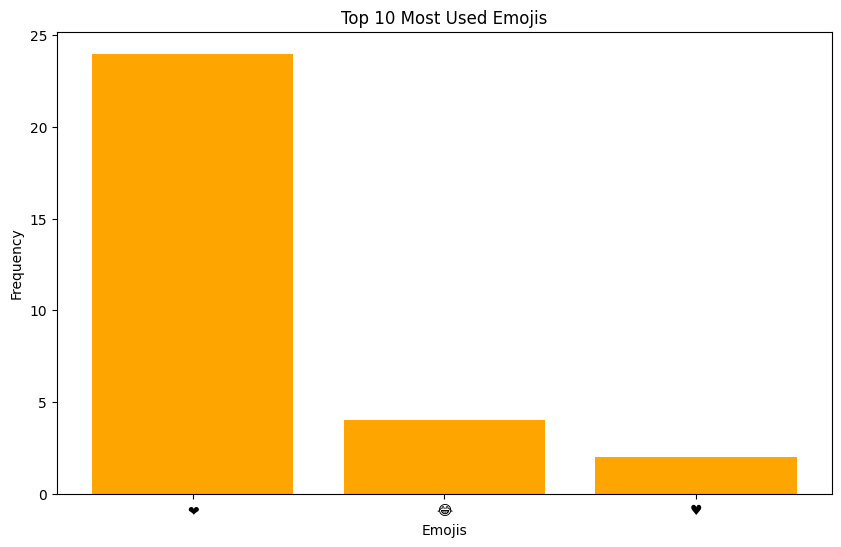

In [4]:
#new
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import emoji

# Specify the file path
file_path = "/content/extracted_data/your_instagram_activity/comments/post_comments_1.json"

# Load the JSON file
with open(file_path, 'r', encoding='utf-8') as f:
    comments_data = json.load(f)

# Convert JSON to a DataFrame
df_comments = pd.json_normalize(comments_data)

# Count the number of comments
num_comments = df_comments.shape[0]
print(f"Total number of comments: {num_comments}")

# (a) Inspect the Data Structure
print("Columns in the dataset:", df_comments.columns)
print("\nSample Data:")
print(df_comments.head())

# Function to fix double UTF-8 encoded strings
def fix_double_encoding(text):
    try:
        # Decode as bytes, then re-encode as UTF-8
        return bytes(text, "utf-8").decode("utf-8").encode("latin1").decode("utf-8")
    except:
        return text  # Return original text if decoding fails

# Fix the 'Comment.value' column
if 'string_map_data.Comment.value' in df_comments.columns:
    df_comments['string_map_data.Comment.value'] = df_comments['string_map_data.Comment.value'].apply(
        lambda x: fix_double_encoding(x) if isinstance(x, str) else x
    )

# (b1) Word Frequency Analysis
if 'string_map_data.Comment.value' in df_comments.columns:
    # Combine all comments into a single string
    all_comments = ' '.join(df_comments['string_map_data.Comment.value'].dropna())

    # Tokenize the words
    words = all_comments.split()

    # Count word frequency
    word_count = Counter(words)

    # Display the most common words
    print("\nTop 10 Most Common Words:")
    print(word_count.most_common(10))

    # Plot word frequency
    most_common_words = word_count.most_common(10)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title("Top 10 Most Common Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

# (b2) Emoji Usage Analysis
df_comments['emojis'] = df_comments['string_map_data.Comment.value'].apply(
    lambda x: ''.join(c for c in x if c in emoji.EMOJI_DATA) if isinstance(x, str) else ''
)

# Combine all emojis
all_emojis = ''.join(df_comments['emojis'].dropna())

# Count emoji frequency
emoji_count = Counter(all_emojis)

# Display the most common emojis
print("\nTop 10 Most Used Emojis:")
print(emoji_count.most_common(10))

# Plot emoji usage
most_common_emojis = emoji_count.most_common(10)
emojis, counts = zip(*most_common_emojis)

plt.figure(figsize=(10, 6))
plt.bar(emojis, counts, color='orange')
plt.title("Top 10 Most Used Emojis")
plt.xlabel("Emojis")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#for my likes
import json
import pandas as pd
import os

# Specify the file path
file_path = "/content/extracted_data/your_instagram_activity/likes/liked_posts.json"

# Load the JSON file
with open(file_path, 'r') as f:
    comments_data = json.load(f)

# Convert JSON to a DataFrame
df_comments = pd.json_normalize(comments_data)  # Normalizes nested JSON
print(df_comments.head())


In [ ]:
#for my likes
import json
import pandas as pd
import os

# Specify the file path
file_path = "/content/extracted_data/your_instagram_activity/saved/saved_posts.json"

# Load the JSON file
with open(file_path, 'r') as f:
    comments_data = json.load(f)

# Convert JSON to a DataFrame
df_comments = pd.json_normalize(comments_data)  # Normalizes nested JSON
print(df_comments.head())
